# Bisection Method #

The bisection method can be used to find the root of a function, $f(x)$, on the interval $[a,b]$, where $a$ and $b$ must have function values, $f(a)$ and $f(b)$, of opposite sign. For each iteration, 

1) Find the midpoint of $a$ and $b$, $m=(a+b)/2$. 
2) Calculate $f(m)$
3) If $f(m)$ has the same sign as $f(a)$, replace $a$ with $m$. If $f(m)$ has the same sign as $f(b)$, replace $b$ with $m$
4) Repeat until $f(m)$ is sufficiently small.

In [1]:
import numpy as np
import pandas as pd

def bisection_method(f, a, b, tolerance):
    '''
    Find the root of a function using the bisection method

    Parameters
    ----------
    f : function(float) --> float
        The function to find the root of. Input and output must be a single float. 
    a : float
        The lower bound
    b : float
        The upper bound
    tolerance : float
        The tolerance. Routine is terminated when within this distance from root.

    Returns
    -------
    m_values : list(dtype=float)
        The values of m throughout the root-finding. The last value in this list is the root.
    fm_values : list(dtype=float)
        The values of f(m) throughout the root-finding.
    '''
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError(f"The scalars a ({a}, f({a})={f(a)}) and b ({b}, f({b})={f(b)}) do not bound a root.")

    m = (b+a)/2
    fm = f(m)
    m_values, fm_values = [m], [fm]
    while np.abs(fm) >= tolerance:
        if np.sign(fm) == np.sign(f(b)):
            b = m
        elif np.sign(fm) == np.sign(f(a)):
            a = m
        else:
            raise ValueError(f"The scalars a ({a}, f({a})={f(a)}) and b ({b}, f({b})={f(b)}) do not bound a root.")
        m = (b+a)/2
        fm = f(m)
        m_values.append(m)
        fm_values.append(fm)
    
    return m_values, fm_values

m_values, fm_values = bisection_method(np.tanh, -8.93, 4.28, 10**-8)

df = pd.DataFrame({
    "m": m_values,
    "tanh(m)" : fm_values
})
display(df)

,m,tanh(m)
0,-2.325000e+00,-9.810579e-01
1,9.775000e-01,7.519816e-01
2,-6.737500e-01,-5.874412e-01
3,1.518750e-01,1.507180e-01
4,-2.609375e-01,-2.551722e-01
5,-5.453125e-02,-5.447726e-02
6,4.867188e-02,4.863348e-02
7,-2.929687e-03,-2.929679e-03
8,2.287109e-02,2.286711e-02
9,9.970703e-03,9.970373e-03


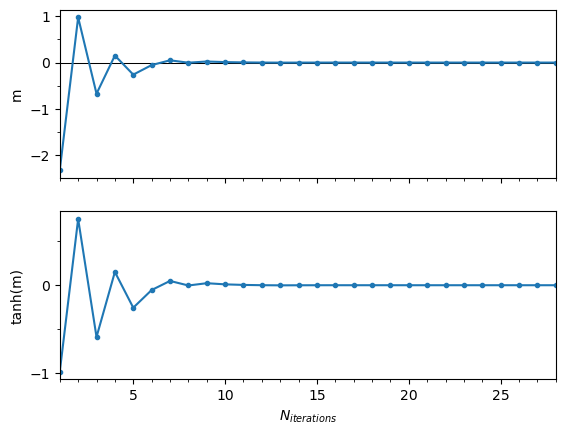

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, sharex=True)

# m
ax[0].axhline(0, color="k", linewidth=0.75)
ax[0].plot(range(1, len(m_values)+1), m_values, marker='.')
ax[0].set_ylabel("m")

# tanh(m)
ax[1].plot(range(1, len(fm_values)+1), fm_values, marker='.')
ax[1].set_ylabel("tanh(m)")
ax[1].set_xlabel(r"$N_{iterations}$")

# X-axis formatting, because sharex=True in plt.subplots, we only have to do this once
ax[0].set_xlim(1, len(m_values))
ax[0].xaxis.set_minor_locator(plt.MultipleLocator(1))

# Y-axis formatting
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax[0].yaxis.set_major_locator(plt.MultipleLocator(1))
ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax[1].yaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

/var/folders/d9/61wzb0q936n_p3z6f86d9qm40000gn/T/ipykernel_36408/812079109.py:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_pos.set_data(xdata[i], ydata[i])


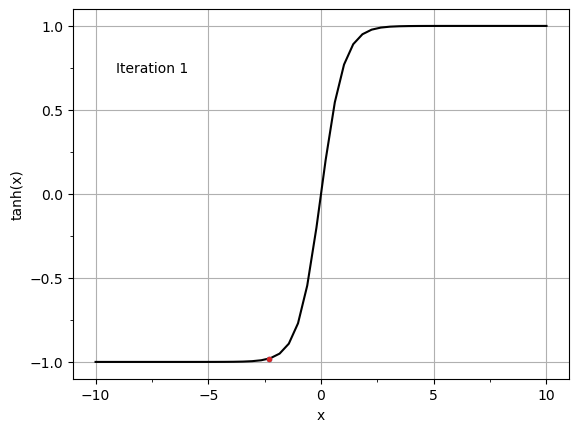

In [3]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

# This is the x and y data you want to plot
xdata, ydata = m_values, fm_values

# Graph tanh(x)
x = np.linspace(-10, 10)
ax.plot(x, np.tanh(x), color="k")

# Initialize lineplots for trajectory and iteration counter
trajectory, = ax.plot([], [], marker=".")
current_pos, = ax.plot([], [], marker=".", color="tab:red")
# IF YOU REUSE THIS CODE YOU MIGHT WANT TO CHANGE WHERE THIS TEXT GOES:
iter_text = ax.text(x=-7.5, y=0.75, s='', horizontalalignment="center", verticalalignment="center")#transform=ax.transAxes)

# Do some formatting
ax.set_xlabel("x")
ax.set_ylabel("tanh(x)")
ax.xaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.grid()

def run(i):
    '''
    Function passed to FuncAnimation to update plot
    '''
    trajectory.set_data(xdata[:i+1], ydata[:i+1])
    current_pos.set_data(xdata[i], ydata[i])
    iter_text.set_text(f"Iteration {i+1}")
    
    return trajectory, current_pos,

ani = animation.FuncAnimation(fig, run, frames=len(xdata), interval=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())